### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

from acquire import get_telco_data
from prepare import prepare_telco_all
from prepare import prepare_telco
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_telco_data()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


In [3]:
train, validate, test = prepare_telco(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head().T

train -> (3943, 29)
validate -> (1691, 29)
test -> (1409, 29)


,4604,5566,6204,5837,1276
customer_id,1004-NOZNR,1051-GEJLJ,4632-PAOYU,5868-YTYKS,0895-LMRSF
male,1,0,1,1,1
senior_citizen,1,0,0,0,0
partners,0,0,1,0,0
dependents,1,0,1,1,0
tenure,56,2,22,1,23
phone_service,1,1,1,1,1
multiple_lines,0,0,0,0,0
internet_service_type,2,3,3,3,1
online_security,1,0,0,0,0


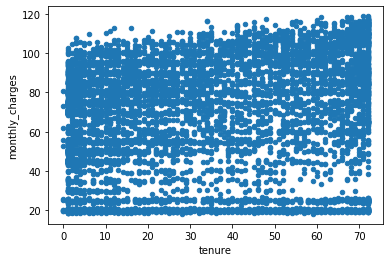

In [4]:
df.plot.scatter(y ='monthly_charges', x ='tenure')

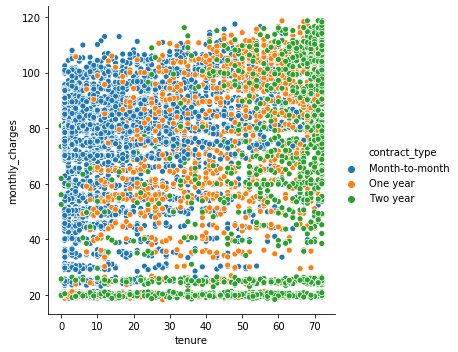

In [5]:
sns.relplot(x='tenure', y='monthly_charges', hue='contract_type', data=df)

In [6]:
print(df.tenure.describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


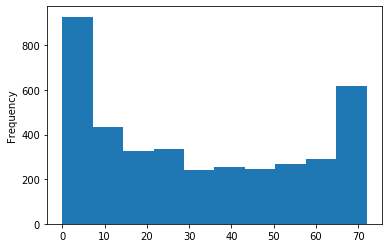

In [7]:
train.tenure.plot.hist()

In [8]:
# 1. create the object
scaler1 = sklearn.preprocessing.MinMaxScaler()
# 2. fit the object
scaler1.fit(train[['tenure']])
# 3. use the object
train['tenure_scaled'] = scaler1.transform(train[['tenure']])
test['tenure_scaled'] = scaler1.transform(test[['tenure']])
validate['tenure_scaled'] = scaler1.transform(validate[['tenure']])

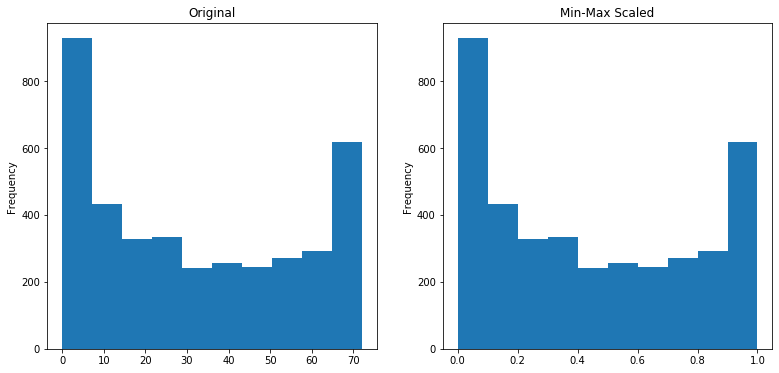

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tenure.plot.hist(title='Original')
plt.subplot(122)
train.tenure_scaled.plot.hist(title='Min-Max Scaled')

### MinMaxScaler()

In [10]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()
# 2. fit the object
scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

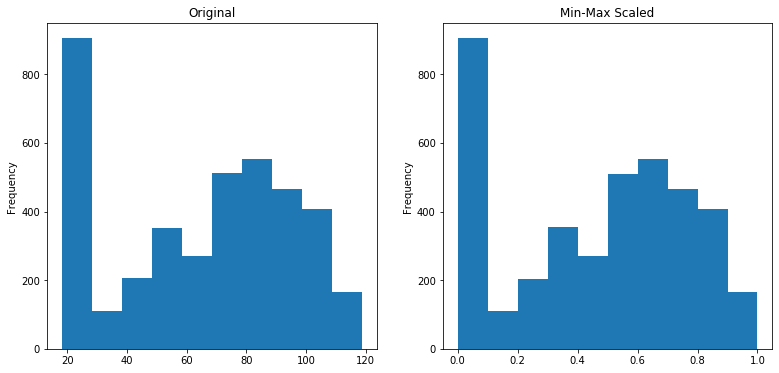

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')

In [12]:
train.T

,4604,5566,6204,5837,1276,3042,5110,2090,5217,624,...,4713,1547,4012,3482,4541,1794,817,901,1987,6958
customer_id,1004-NOZNR,1051-GEJLJ,4632-PAOYU,5868-YTYKS,0895-LMRSF,2952-QAYZF,0530-IJVDB,5126-RCXYW,3134-DSHVC,5071-FBJFS,...,2924-KHUVI,5829-NVSQN,7356-IWLFW,4902-OHLSK,9948-YPTDG,0017-DINOC,6629-CZTTH,7377-DMMRI,3400-ESFUW,8612-GXIDD
male,1,0,1,1,1,1,1,1,0,0,...,1,0,1,0,1,1,1,1,1,1
senior_citizen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
partners,0,0,1,0,0,0,0,1,0,1,...,1,1,1,0,1,0,0,0,1,1
dependents,1,0,1,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
tenure,56,2,22,1,23,5,70,54,63,4,...,56,23,46,29,38,54,1,2,55,12
phone_service,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
multiple_lines,0,0,0,0,0,1,1,0,1,0,...,1,0,1,1,0,0,0,0,0,1
internet_service_type,2,3,3,3,1,2,2,1,2,1,...,2,1,2,2,2,1,1,1,1,3
online_security,1,0,0,0,0,0,1,0,1,1,...,1,1,0,0,1,1,0,1,1,0


### StandardScaler()

In [13]:
# 1. create the object
scaler = sklearn.preprocessing.StandardScaler()
# 2. fit the object
scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

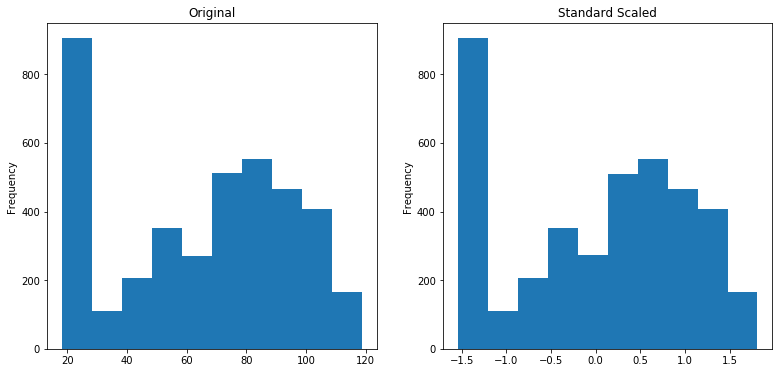

In [14]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Standard Scaled')

## Robust Scaler

In [15]:
# 1. create the object
scaler = sklearn.preprocessing.RobustScaler()
# 2. fit the object
scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

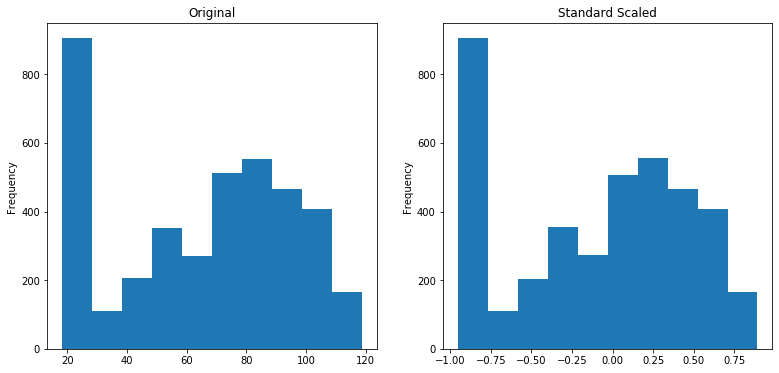

In [16]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Standard Scaled')

In [17]:
# Function created to run scaler.fit_transform. Way to show visual
def visualize_scaler(scaler, scaler_name):
    monthly_charges_scaled = scaler.fit_transform(train[['monthly_charges']])
    fig = plt.figure(figsize=(12, 10))
    gs = plt.GridSpec(2, 2) # subplot with a 2x2 grid
    ax1 = fig.add_subplot(gs[0, :]) # the first row, all the columns
    ax2 = fig.add_subplot(gs[1, 0]) # second row, first column
    ax3 = fig.add_subplot(gs[1, 1]) # second row, second column
    
    ax1.scatter(train.monthly_charges, monthly_charges_scaled)
    ax1.set(xlabel='monthly_charges', ylabel='monthly_charges_scaled', title=scaler_name)
    ax2.hist(train.monthly_charges)
    ax2.set(title='Original')
    ax3.hist(monthly_charges_scaled)
    ax3.set(title='Scaled')

# Min-Max Scaling visual

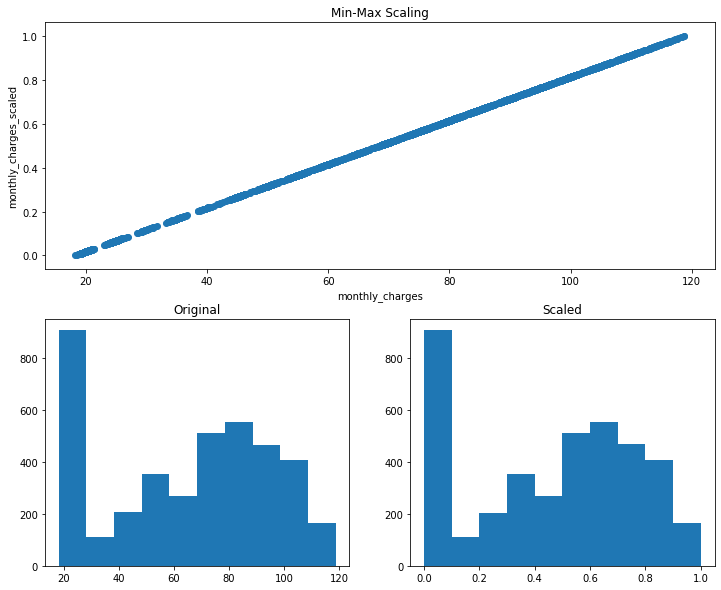

In [18]:
visualize_scaler(sklearn.preprocessing.MinMaxScaler(), 'Min-Max Scaling')

# Standard Scaling visual

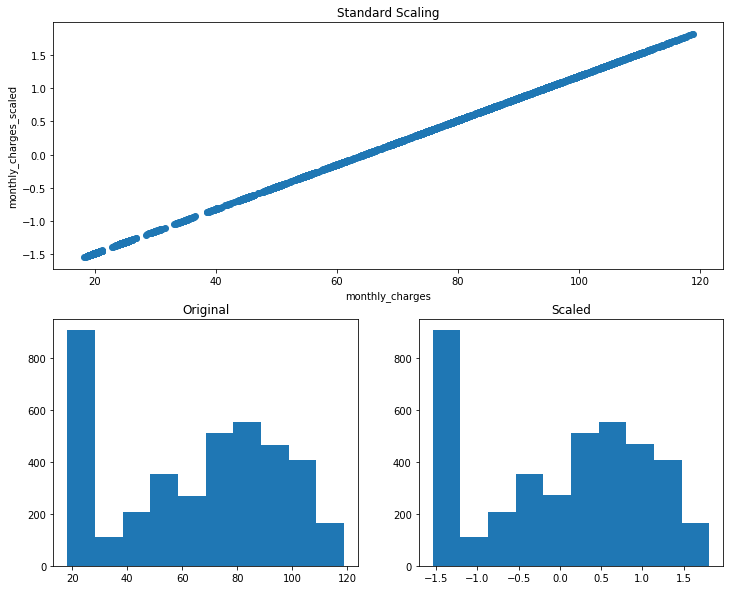

In [19]:
visualize_scaler(sklearn.preprocessing.StandardScaler(), 'Standard Scaling')

# Robust Scaling visual

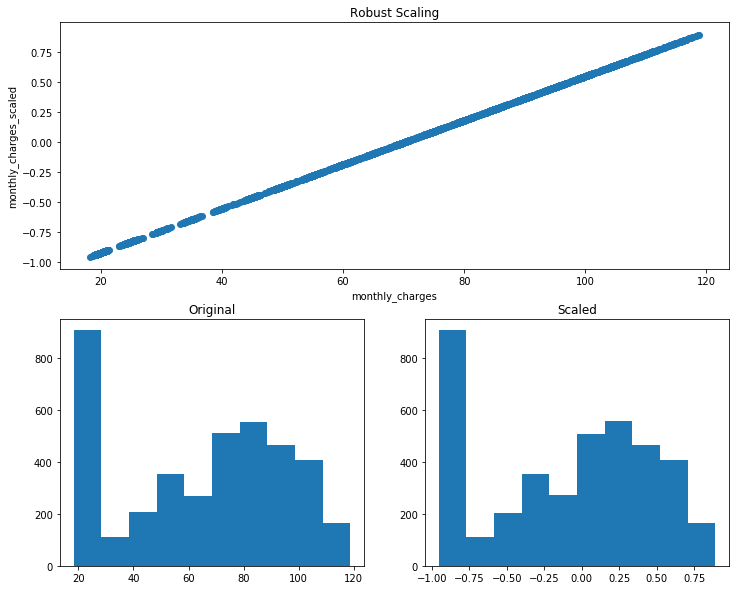

In [20]:
visualize_scaler(sklearn.preprocessing.RobustScaler(), 'Robust Scaling')

In [21]:
#train = train[["monthly_charges", 'tenure_scaled', 'monthly_charges_scaled']]
#validate = validate[["monthly_charges", 'tenure_scaled', 'monthly_charges_scaled']]
#test = test[["monthly_charges", 'tenure_scaled', 'monthly_charges_scaled']]

In [22]:
train.head().T

,4604,5566,6204,5837,1276
customer_id,1004-NOZNR,1051-GEJLJ,4632-PAOYU,5868-YTYKS,0895-LMRSF
male,1,0,1,1,1
senior_citizen,1,0,0,0,0
partners,0,0,1,0,0
dependents,1,0,1,1,0
tenure,56,2,22,1,23
phone_service,1,1,1,1,1
multiple_lines,0,0,0,0,0
internet_service_type,2,3,3,3,1
online_security,1,0,0,0,0


### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [23]:
train2 = train[['tenure','tenure_scaled','monthly_charges','monthly_charges_scaled']]
# Note the last ran scaler was for monthly_charges. Have to inverse transform on it.
scaler.fit(train[['monthly_charges']])
train2['inverse_t_monthly_char'] = scaler.inverse_transform(train[['monthly_charges_scaled']])
train2
# Again the first scaler ran from problem 1 was used. Make sure to keep track of each 
scaler1.fit(train[['tenure']])
train2['inverse_t_tenure'] = scaler1.inverse_transform(train[['tenure_scaled']])
train2.head()

,tenure,tenure_scaled,monthly_charges,monthly_charges_scaled,inverse_t_monthly_char,inverse_t_tenure
4604,56,0.777778,94.80,0.453125,94.80,56.0
5566,2,0.027778,19.50,-0.931066,19.50,2.0
6204,22,0.305556,19.95,-0.922794,19.95,22.0
5837,1,0.013889,20.25,-0.917279,20.25,1.0
1276,23,0.319444,64.90,-0.096507,64.90,23.0


In [26]:
#How to reshape an array to have unlimited rows and 1 column
x = np.array([1, 2, 3]).reshape(-1, 1)
x

array([[1],
       [2],
       [3]])

### The data is the same. Have to inverse transform on the scaled data.

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [43]:
scaler3 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# fit the scalar
scaler3.fit(train[['monthly_charges']])
# use the scalar 
train['monthly_charges_scaled'] = scaler3.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler3.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler3.transform(validate[['monthly_charges']])

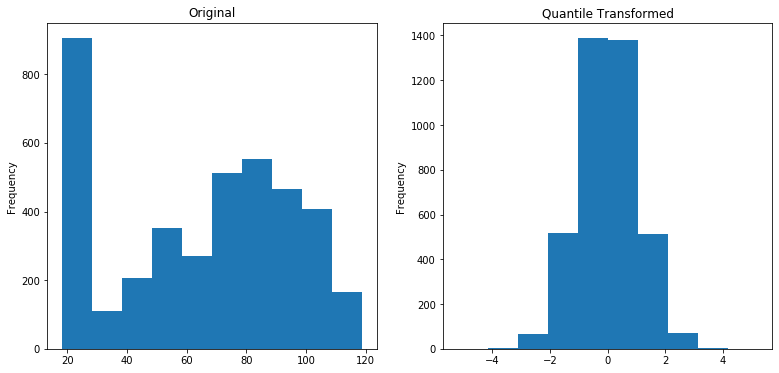

In [44]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Quantile Transformed')

# Quantile Transformed visual

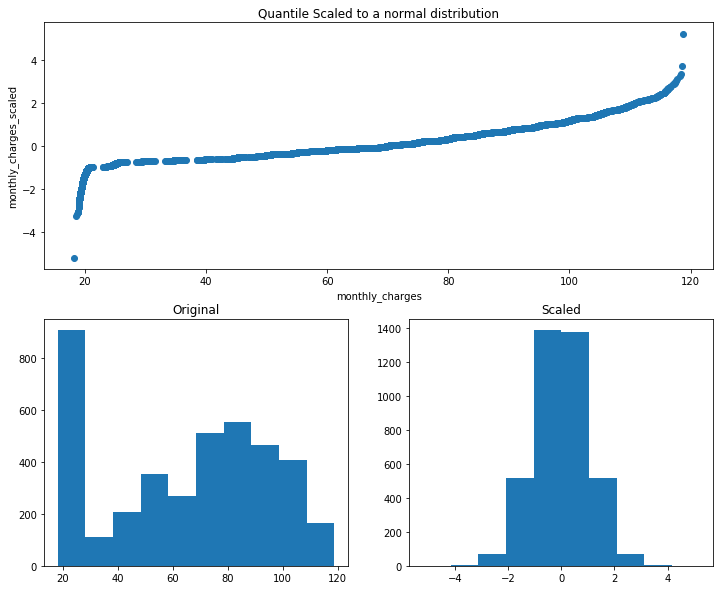

In [40]:
visualize_scaler(
    sklearn.preprocessing.QuantileTransformer(output_distribution='normal'),
    'Quantile Scaled to a normal distribution',
)

In [45]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   scaling.ipynb
	modified:   wrangle.py

no changes added to commit (use "git add" and/or "git commit -a")


In [49]:
!git add wrangle.py

In [50]:
!git commit -m "added scaled equations"

[master 3e34781] added scaled equations
 1 file changed, 31 insertions(+)


In [51]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 721 bytes | 721.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/george887/regression-exercises.git
   f0829ec..3e34781  master -> master
